In [18]:
import os
import csv
import random
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from citipy import citipy 
# NOTE: citipy is outdated and self-reported as incomplete and inaccurate, using OpenWeatherAPI city ID list instead

# OpenWeatherMap API INFORMATION
# City ID List: http://bulk.openweathermap.org/sample/city.list.json.gz

In [224]:
# RUN A TEST: Pull OpenWeatherAPI "Current Weather Data" for Morristown, NJ and check it out ("lon": -83.294891,"lat": 36.213982)

#test_url = "http://api.openweathermap.org/data/2.5/weather?lat=36.213982&lon=-83.294891&APPID=6fb692f7f116da3300853ca46962f8b5"
#motown = requests.get(test_url).json()
#print(json.dumps(motown, indent=4))
motown["weather"][0]["description"]

'light snow'

In [225]:
# Generate a list of 500 randomly selected cities from the OpenWeatherAPI city list, and grab their City IDs 

# Load and inspect the OpenWeatherAPI cities.list.json file
cities = json.load(open("city.list.json"))    
#cities[0] # Take a look at the first city
#cities[0]["coord"]["lat"] # Identify the latitude
#len(cities) # See how many cities are in the database

# Generate a random sample of 500 numbers from the range of len(cities) in the list to serve as index number selections
city_sample_500 = random.sample(list(range(len(cities))), 500) # Pick 500 random numbers from the list of cities
#city_sample_500 # Confirm list of index numbers

# Pull the City ID for each of the randomly selected index numbers from city.list.json
city_ids = [cities[city]["id"] for city in city_sample_500]
city_ids[0:11]


[6535364,
 3034992,
 6548502,
 673737,
 543939,
 2900499,
 3134599,
 2661453,
 2143437,
 4328044,
 2896852]

In [6]:
# Create a JSON object of weather records for the 500 cities and print them to a CSV file with ID, name, and URL

url = "http://api.openweathermap.org/data/2.5/weather?id="
api = "&APPID=6fb692f7f116da3300853ca46962f8b5"

weather_list = []
with open("HW6_500cities.csv", "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=",")
    csvwriter.writerow(["City_ID", "City_Name", "City_Weather_URL"])
    for city_id in city_ids:
        city_url = (url + str(city_id) + api)
        weather_record = requests.get(city_url).json()
        weather_list.append(weather_record)
        csvwriter.writerow([weather_record["id"],weather_record["name"],str(city_url)])


In [55]:
# Create a Master DataFrame to make scatterplots of latitude vs. temperature, humidity, cloudiness and wind speed
master = []
for n in range(len(weather_list)):
    record = [weather_list[n]["id"], weather_list[n]["name"], weather_list[n]["coord"]["lat"], weather_list[n]["main"]["temp"], weather_list[n]["weather"][0]["id"], weather_list[n]["clouds"]["all"], weather_list[n]["main"]["humidity"], weather_list[n]["wind"]["speed"]]
    master.append(record)

# Make column headers for DataFrame from "master" list
labels = ["City ID", "City", "Latitude", "Temperature (K)", "Condition ID", "Cloudiness (%)", "Humidity (%)", "Wind Speed (m/s)"]

# Make DataFrame from "master" list with column headers
weather_df = pd.DataFrame.from_records(master, columns=labels)

#weather_df.head()

In [68]:
# Convert Kelvin to Fahrenheit: Tf = Tk * 9/5 - 459.67
weather_df["Temperature (F)"] = round(weather_df["Temperature (K)"] * 9/5 -459.67, 0)

# Convert m/s to mph: 1 m/s = 2.23694 mph
weather_df["Wind Speed (mph)"] = round(weather_df["Wind Speed (m/s)"] * 2.23694, 1)

weather_df.head()

,City ID,City,Latitude,Temperature (K),Condition ID,Cloudiness (%),Humidity (%),Wind Speed (m/s),Temperature (F),Wind Speed (mph)
0,6557228,Rückholz,47.67,283.56,803,75,71,7.7,51.0,17.2
1,5195550,Johnsonburg,40.89,269.38,802,40,74,4.1,25.0,9.2
2,4595864,Simpsonville,34.74,278.03,301,90,93,3.6,41.0,8.1
3,6357219,Encinas Reales,37.28,288.18,802,40,62,4.6,59.0,10.3
4,2967628,Vouneuil-sous-Biard,46.57,282.15,500,92,93,7.2,48.0,16.1


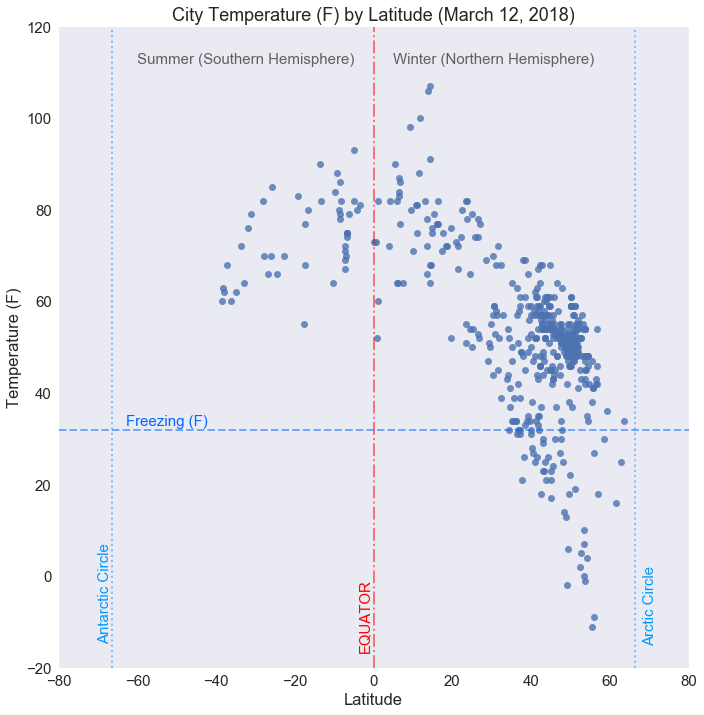

In [220]:
# Scatterplot Latitude vs. Temperature (F)

sns.set(style="dark", font_scale=1.5)

sns.lmplot(x="Latitude", y="Temperature (F)", data=weather_df, size=10, fit_reg=False)
plt.title("City Temperature (F) by Latitude (March 12, 2018)")
plt.ylabel("Temperature (F)")
plt.ylim(-20,120)
plt.xlabel("Latitude")
plt.xlim(-80,80)

plt.text(-4, -3, "EQUATOR", color="r", rotation=90, size=15)
plt.vlines(0, -20, 120, lw=2, colors="r", linestyles="-.", alpha=0.5)

plt.text(-60, 112, "Summer (Southern Hemisphere)", color="#606060", size=15)
plt.text(5, 112, "Winter (Northern Hemisphere)", color="#606060", size=15)

plt.vlines(66.5, -20, 120, lw=2, colors="#0099FF", linestyles=":", alpha=0.5)
plt.text(68.5, 0, "Arctic Circle", color="#0099FF", rotation=90, size=15)

plt.text(-63, 33, "Freezing (F)", color="#0066FF", size=15)
plt.hlines(32, -80, 80, lw=2, colors="#0066FF", linestyles="--", alpha=0.5)

plt.vlines(-66.5, -20, 120, lw=2, colors="#0099FF", linestyles=":", alpha=0.5)
plt.text(-70, 5, "Antarctic Circle", color="#0099FF", rotation=90, size=15)

plt.savefig("HW6_Latitude_vs_Temperature.png")

plt.show()

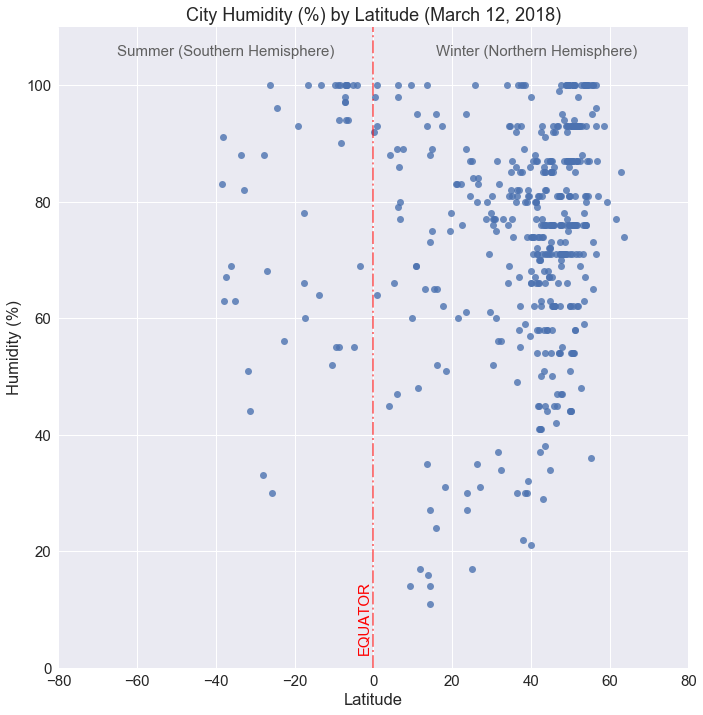

In [221]:
# Scatterplot Latitude vs. Humidity (%)

sns.set(style="darkgrid", font_scale=1.5)

sns.lmplot(x="Latitude", y="Humidity (%)", data=weather_df, size=10, fit_reg=False)
plt.title("City Humidity (%) by Latitude (March 12, 2018)")
plt.ylabel("Humidity (%)")
plt.ylim(0,110)
plt.xlabel("Latitude")
plt.xlim(-80,80)

plt.vlines(0, 0, 110, lw=2, colors="r", linestyles="dashdot", alpha=0.5)
plt.text(-4, 13, "EQUATOR", color="r", rotation=90, size=15)

plt.text(-65, 105, "Summer (Southern Hemisphere)", color="#606060", size=15)
plt.text(16, 105, "Winter (Northern Hemisphere)", color="#606060", size=15)

plt.savefig("HW6_Latitude_vs_Humidity.png")

plt.show()

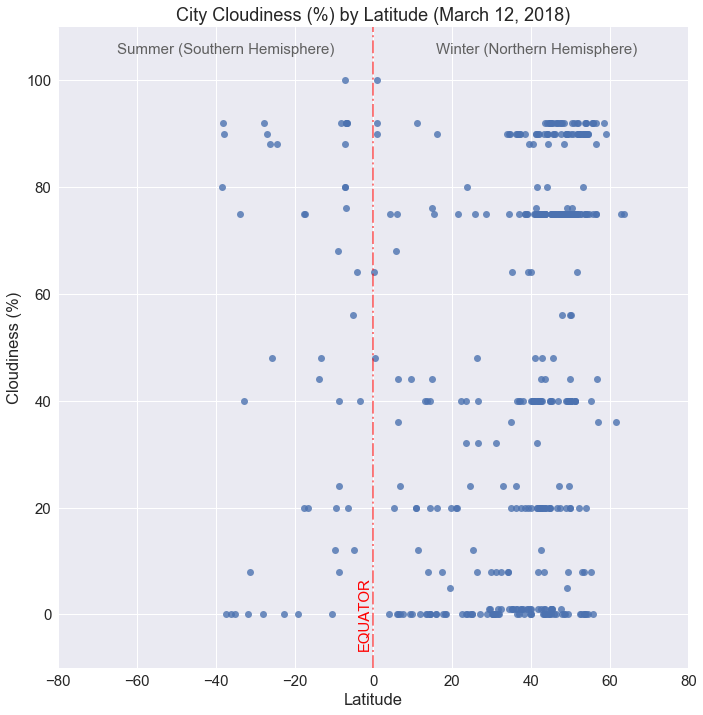

In [222]:
# Scatterplot Latitude vs. Coudiness (%)

sns.set(style="darkgrid", font_scale=1.5)

sns.lmplot(x="Latitude", y="Cloudiness (%)", data=weather_df, size=10, fit_reg=False)
plt.title("City Cloudiness (%) by Latitude (March 12, 2018)")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,110)
plt.xlabel("Latitude")
plt.xlim(-80,80)

plt.vlines(0, -10, 110, lw=2, colors="r", linestyles="dashdot", alpha=0.5)
plt.text(-4, 5, "EQUATOR", color="r", rotation=90, size=15)

plt.text(-65, 105, "Summer (Southern Hemisphere)", color="#606060", size=15)
plt.text(16, 105, "Winter (Northern Hemisphere)", color="#606060", size=15)

plt.savefig("HW6_Latitude_vs_Cloudiness.png")

plt.show()

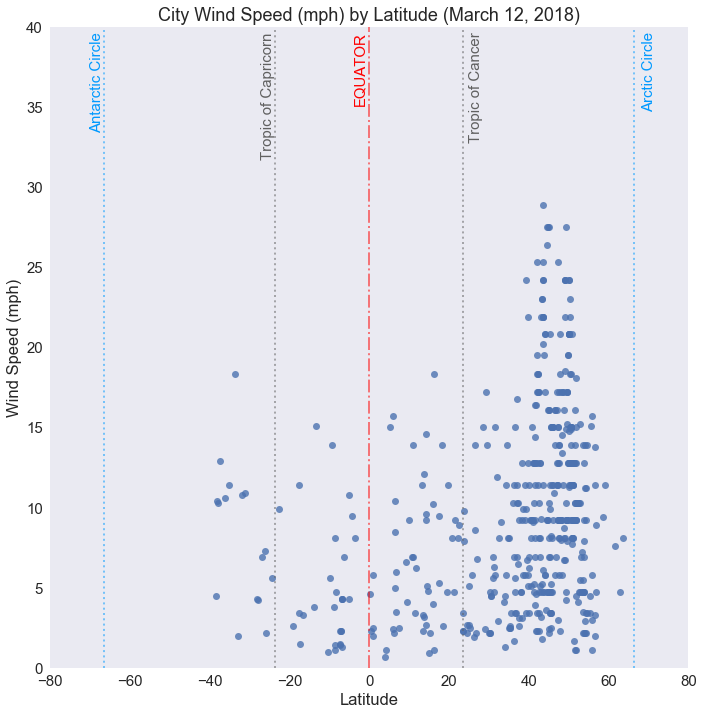

In [230]:
# Scatterplot Latitude vs. Wind Speed (mph)

sns.set(style="dark", font_scale=1.5)

sns.lmplot(x="Latitude", y="Wind Speed (mph)", data=weather_df, size=10, fit_reg=False)
plt.title("City Wind Speed (mph) by Latitude (March 12, 2018)")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0,40)
plt.xlabel("Latitude")
plt.xlim(-80,80)

plt.vlines(66.5, 0, 40, lw=2, colors="#0099FF", linestyles=":", alpha=0.5)
plt.text(68.5, 39, "Arctic Circle", color="#0099FF", rotation=90, size=15)

plt.vlines(23.5, 0, 40, lw=2, colors="#606060", linestyles=":", alpha=0.5)
plt.text(25, 39, "Tropic of Cancer", color="#606060", rotation=90, size=15)

plt.vlines(0, 0, 40, lw=2, colors="r", linestyles="dashdot", alpha=0.5)
plt.text(-4, 39, "EQUATOR", color="r", rotation=90, size=15)

plt.vlines(-23.5, 0, 40, lw=2, colors="#606060", linestyles=":", alpha=0.5)
plt.text(-27, 39, "Tropic of Capricorn", color="#606060", rotation=90, size=15)

plt.vlines(-66.5, 0, 40, lw=2, colors="#0099FF", linestyles=":", alpha=0.5)
plt.text(-70, 39, "Antarctic Circle", color="#0099FF", rotation=90, size=15)

plt.savefig("HW6_Latitude_vs_WindSpeed.png")

plt.show()

In [252]:
print("Three Trends from WeatherPy Analysis: ")
print("\n1. Temperature drops sharply with distance from the Equator in the Winter season (Northern Hemisphere).")
print("\n2. On March 12, 2018, humidity, cloudiness and wind speed did not appear to be related to distance from the Equator, however a small sample of cities closer to the Equator had humidity levels <20%.")
print("\n3. On March 12, 2018, a small sample of ~20 Northern Hemisphere cities experienced wind speeds >20 mph.")

Three Trends from WeatherPy Analysis: 

1. Temperature drops sharply with distance from the Equator in the Winter season (Northern Hemisphere).

2. On March 12, 2018, humidity, cloudiness and wind speed did not appear to be related to distance from the Equator, however a small sample of cities closer to the Equator had humidity levels <20%.

3. On March 12, 2018, a small sample of ~20 Northern Hemisphere cities experienced wind speeds >20 mph.
